## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)
pd.set_option('display.max_columns', 100)

## Read the data

In [4]:
train = './data/train.csv'
test = './data/test.csv'

df = pd.read_csv(train)
df_test = pd.read_csv(test)
df.sample(n=5)

test_id = df_test.Id

In [5]:
import qgrid
qgrid.show_grid(df, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Data manipulation

In [6]:
df['Garage Type'] = df['Garage Type'].fillna('None')
df_test['Garage Type'] = df_test['Garage Type'].fillna('None')

df['Garage Cars'] = df['Garage Cars'].fillna(0)
df_test['Garage Cars'] = df_test['Garage Cars'].fillna(0)

df['Total Bsmt SF'] = df['Total Bsmt SF'].fillna(0)
df_test['Total Bsmt SF'] = df_test['Total Bsmt SF'].fillna(0)

In [7]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0]
missing_data = list(missing_data.index)
missing_data

df.drop(missing_data, axis=1, inplace=True)
df_test.drop(missing_data, axis=1, inplace=True)
print(df.shape)
print(df_test.shape)

(2051, 58)
(879, 57)


## Feature engineering

In [8]:
garage_dummies = pd.get_dummies(df['Garage Type'], prefix='Garage')
garage_dummies_test = pd.get_dummies(df_test['Garage Type'], prefix='Garage')

In [9]:
df['MS Zoning'] = df['MS Zoning'].str.replace('R.', 'R', regex=True)
df_test['MS Zoning'] = df_test['MS Zoning'].str.replace('R.', 'R', regex=True)
# All residentials as a single variable

zoning_dummies = pd.get_dummies(df['MS Zoning'], prefix='Zoning')
zoning_dummies_test = pd.get_dummies(df_test['MS Zoning'], prefix='Zoning')

zoning_dummies = zoning_dummies[['Zoning_R']]
zoning_dummies_test = zoning_dummies_test[['Zoning_R']]

In [10]:
h_style_dummies = pd.get_dummies(df['House Style'], prefix='Style')
h_style_dummies_test = pd.get_dummies(df_test['House Style'], prefix='Style')

h_style_dummies = h_style_dummies[['Style_1Story', 'Style_2Story']] # Just the 2 most common
h_style_dummies_test = h_style_dummies_test[['Style_1Story', 'Style_2Story']] # Just the 2 most common

In [11]:
sale_type_dummies = pd.get_dummies(df['Sale Type'], prefix='Sale')
sale_type_dummies_test = pd.get_dummies(df_test['Sale Type'], prefix='Sale')

sale_type_dummies = sale_type_dummies[['Sale_New', 'Sale_WD ']] # Looking for new or WD
sale_type_dummies_test = sale_type_dummies_test[['Sale_New', 'Sale_WD ']] # Looking for new or WD

New in try 5

In [12]:
condition_dummies = pd.get_dummies(df['Condition 1'], prefix='Condition')
condition_dummies_test = pd.get_dummies(df_test['Condition 1'], prefix='Condition')

condition_dummies = condition_dummies[['Condition_Norm', 'Condition_PosA', 'Condition_PosN']]
condition_dummies_test = condition_dummies_test[['Condition_Norm', 'Condition_PosA', 'Condition_PosN']]

In [13]:
foundation_dummies = pd.get_dummies(df['Foundation'], prefix='Foundation')
foundation_dummies_test = pd.get_dummies(df_test['Foundation'], prefix='Foundation')

foundation_dummies = foundation_dummies[['Foundation_PConc']]
foundation_dummies_test = foundation_dummies_test[['Foundation_PConc']]

In [14]:
heating_dummies = pd.get_dummies(df['Heating QC'], prefix='Heating')
heating_dummies_test = pd.get_dummies(df_test['Heating QC'], prefix='Heating')

heating_dummies = heating_dummies[['Heating_Ex']]
heating_dummies_test = heating_dummies_test[['Heating_Ex']]

In [15]:
#df['Functional'] = df['Functional'].str.slice(0,3)
#df_test['Functional'] = df_test['Functional'].str.slice(0,3)

functional_dummies = pd.get_dummies(df['Functional'], prefix='Functional')
functional_dummies_test = pd.get_dummies(df_test['Functional'], prefix='Functional')

functional_dummies = functional_dummies[['Functional_Typ']]
functional_dummies_test = functional_dummies_test[['Functional_Typ']]

In [16]:
dummies = pd.concat([garage_dummies, zoning_dummies, h_style_dummies, sale_type_dummies, condition_dummies, foundation_dummies, heating_dummies, functional_dummies], axis=1)
dummies_test = pd.concat([garage_dummies_test, zoning_dummies_test, h_style_dummies_test, sale_type_dummies_test, condition_dummies_test, foundation_dummies_test, heating_dummies_test, functional_dummies_test], axis=1)

In [17]:






#df['vtype'] = df.vtype.map({'car':0, 'truck':1})







New in try 5

In [18]:
df['AgeBuilt'] = 2019 - df['Year Built']
df_test['AgeBuilt'] = 2019 - df_test['Year Built']

df['AgeRemod'] = 2019 - df['Year Remod/Add']
df_test['AgeRemod'] = 2019 - df_test['Year Remod/Add']

df['BuiltArea'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['Gr Liv Area']
df_test['BuiltArea'] = df_test['Total Bsmt SF'] + df_test['1st Flr SF'] + df_test['Gr Liv Area']






#### LOG







## Feature and predictor selection

In [19]:
feature_cols = ['Overall Qual', 'Full Bath', 'Garage Cars', 'Lot Area', 'AgeBuilt', 'AgeRemod', 'BuiltArea', 'Open Porch SF', 'Enclosed Porch']
X = df[feature_cols]
X = pd.concat([X, dummies], axis = 1)
print(X.shape)

X_df_test = df_test[feature_cols]
X_df_test = pd.concat([X_df_test, dummies_test], axis = 1)
print(X_df_test.shape)

(2051, 27)
(879, 27)


In [20]:
y = df['SalePrice']

## Train test split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 99)

## Model fitting

In [22]:
rfr = RandomForestRegressor(n_estimators=300)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 51))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    print(depth)
    rfr = RandomForestRegressor(n_estimators=100, max_depth=depth)
    MSE_scores = cross_val_score(rfr, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

1


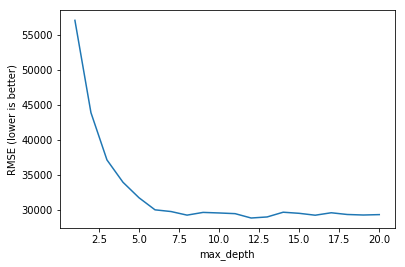

In [26]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [ ]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, max_depth_range))[0]

## Model prediction

In [47]:
y_pred = rfr.predict(X_test)

## Cross Validation

In [48]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(cross_val_score(rfr, X, y, cv=kf)))
print(np.sqrt(np.mean(-cross_val_score(rfr, X, y, cv=kf, scoring='neg_mean_squared_error'))))

0.8674316811872653
28630.714085680167


## Predict with test data

In [49]:
y_pred = rfr.predict(X_df_test)

prediction = pd.concat([test_id, pd.Series(y_pred)], axis = 1)
prediction.columns = ['Id', 'SalePrice']

prediction.sample(5)

,Id,SalePrice
845,2123,165637.706667
555,1117,220549.646667
400,1558,88594.321270
632,293,192184.886667
139,1717,183170.330000


In [55]:
pd.DataFrame({'feature':X.columns, 'importance':rfr.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
0,Overall Qual,0.556231
6,BuiltArea,0.285769
3,Lot Area,0.033547
4,AgeBuilt,0.030874
5,AgeRemod,0.025593
7,Open Porch SF,0.017659
2,Garage Cars,0.011399
1,Full Bath,0.007983
18,Style_2Story,0.005981
17,Style_1Story,0.003107


In [ ]:
prediction.to_csv("Emilio_Try5_RandomForest2.csv", index=False)